In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionV3

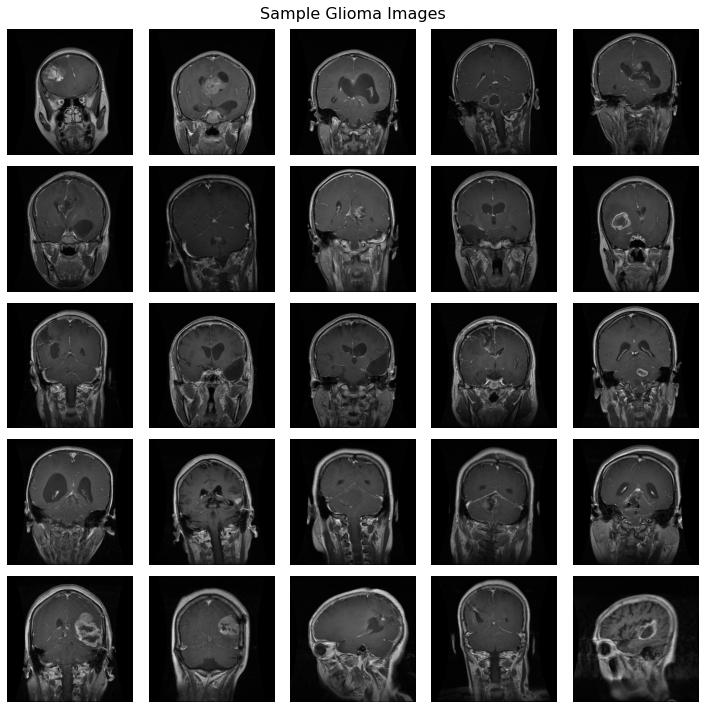

In [2]:
glioma="dataset/Training/glioma"
image_files = os.listdir(glioma)

plt.figure(figsize=(10, 10))

for i in range(25):
    img_path = os.path.join(glioma, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle('Sample Glioma Images', fontsize=16)
plt.tight_layout()
plt.show()

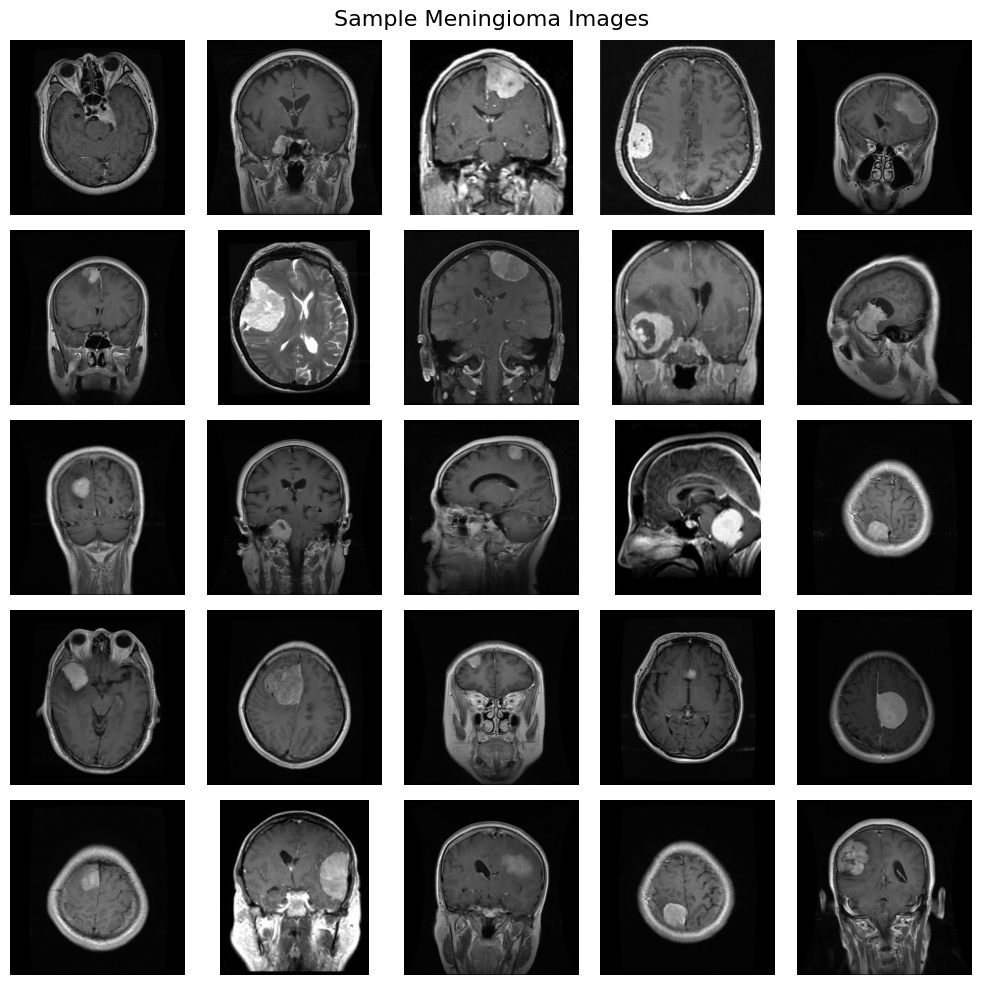

In [5]:
meningioma_dir="dataset/Training/meningioma/"
image_files = os.listdir(meningioma_dir)

plt.figure(figsize=(10, 10))

for i in range(25):
    img_path = os.path.join(meningioma_dir, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle('Sample Meningioma Images', fontsize=16)
plt.tight_layout()
plt.show()

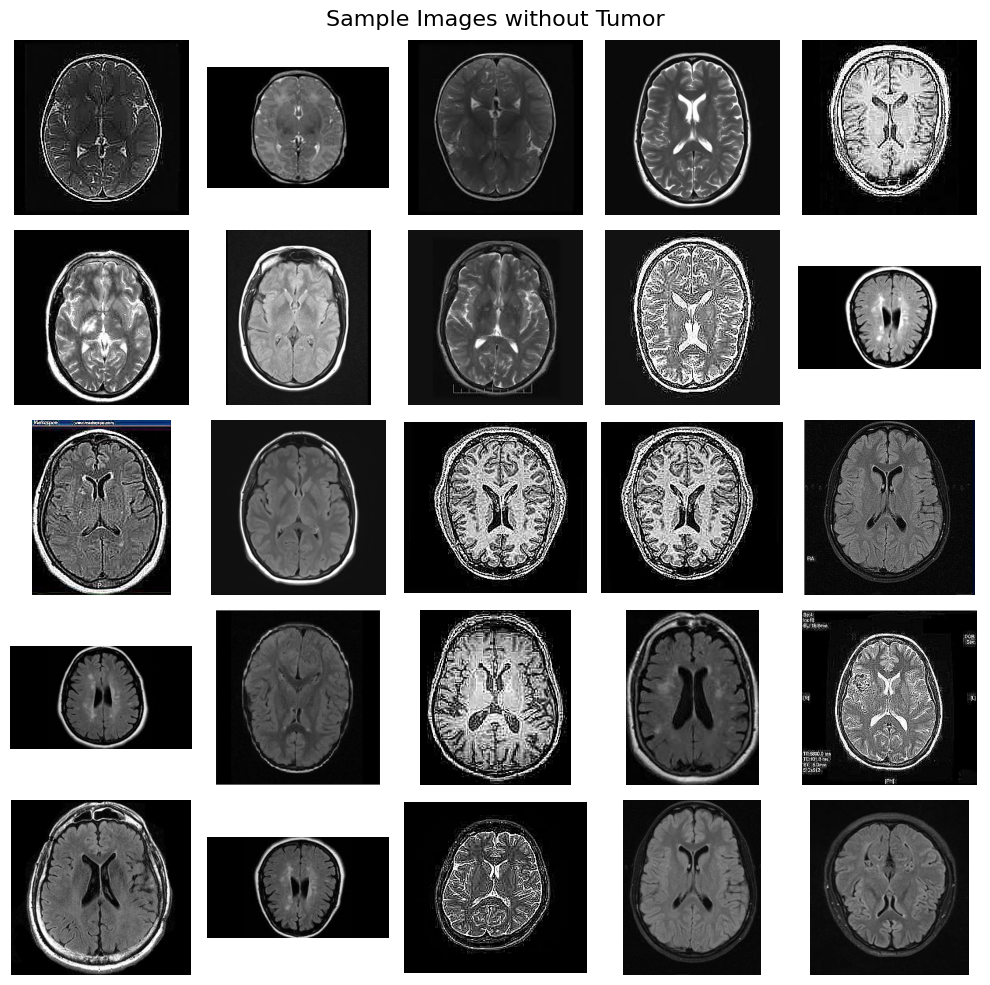

In [6]:
notumor_dir="dataset/Training/notumor/"
image_files = os.listdir(notumor_dir)

plt.figure(figsize=(10, 10))

for i in range(25):
    img_path = os.path.join(notumor_dir, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle('Sample Images without Tumor', fontsize=16)
plt.tight_layout()
plt.show()

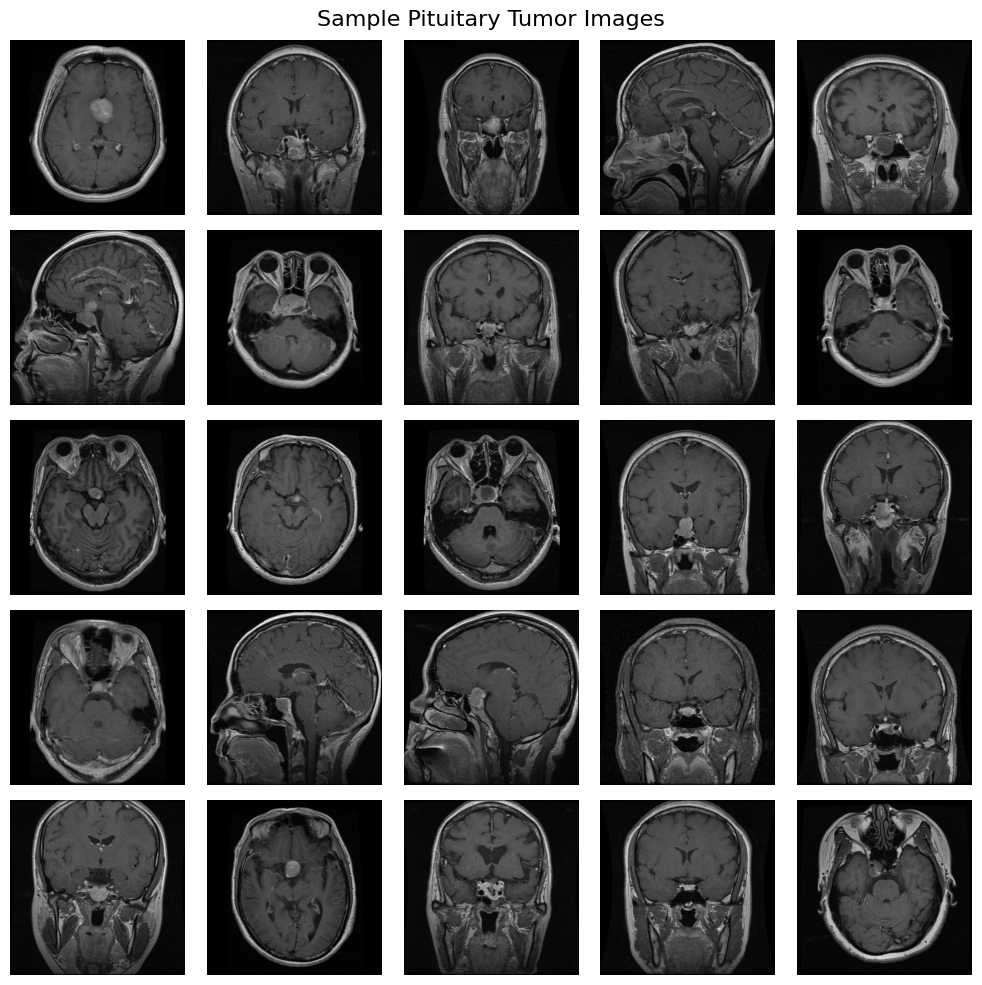

In [7]:
pituitary_dir="dataset/Training/pituitary/"
image_files = os.listdir(pituitary_dir)

plt.figure(figsize=(10, 10))

for i in range(25):
    img_path = os.path.join(pituitary_dir, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle('Sample Pituitary Tumor Images', fontsize=16)
plt.tight_layout()
plt.show()

In [3]:
train_data="dataset/Training"
test_data="dataset/Testing/"
valid_data="dataset/Testing/"

In [4]:
filepath=[]
label=[]
image_folder=os.listdir(train_data)
for folder in image_folder:
    folder_path=os.path.join(train_data,folder)
    filelist=os.listdir(folder_path)
    for file in filelist:
        new_path=os.path.join(folder_path,file)
        filepath.append(new_path)
        label.append(folder)


image_data=pd.Series(filepath,name="image_data")
label_data=pd.Series(label,name="label")
train_dataset=pd.concat([image_data,label_data],axis=1)
train_dataset.head()

,image_data,label
0,dataset/Training\glioma\Tr-glTr_0000.jpg,glioma
1,dataset/Training\glioma\Tr-glTr_0001.jpg,glioma
2,dataset/Training\glioma\Tr-glTr_0002.jpg,glioma
3,dataset/Training\glioma\Tr-glTr_0003.jpg,glioma
4,dataset/Training\glioma\Tr-glTr_0004.jpg,glioma


In [10]:
train_dataset.shape

(5712, 2)

In [11]:
train_dataset.isnull().sum()

image_data    0
label         0
dtype: int64

In [12]:
train_dataset["label"].value_counts()

label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [5]:
filepath=[]
label=[]
image_folder=os.listdir(test_data)
for folder in image_folder:
    folder_path=os.path.join(test_data,folder)
    filelist=os.listdir(folder_path)
    for file in filelist:
        new_path=os.path.join(folder_path,file)
        filepath.append(new_path)
        label.append(folder)


image_data=pd.Series(filepath,name="image_data")
label_data=pd.Series(label,name="label")
test_dataset=pd.concat([image_data,label_data],axis=1)
test_dataset.head()

,image_data,label
0,dataset/Testing/glioma\Te-glTr_0000.jpg,glioma
1,dataset/Testing/glioma\Te-glTr_0001.jpg,glioma
2,dataset/Testing/glioma\Te-glTr_0002.jpg,glioma
3,dataset/Testing/glioma\Te-glTr_0003.jpg,glioma
4,dataset/Testing/glioma\Te-glTr_0004.jpg,glioma


In [14]:
test_dataset.shape

(1311, 2)

In [15]:
test_dataset.isnull().sum()

image_data    0
label         0
dtype: int64

In [16]:
test_dataset["label"].value_counts()

label
notumor       405
meningioma    306
glioma        300
pituitary     300
Name: count, dtype: int64

In [6]:
filepath=[]
label=[]
image_folder=os.listdir(valid_data)
for folder in image_folder:
    folder_path=os.path.join(valid_data,folder)
    filelist=os.listdir(folder_path)
    for file in filelist:
        new_path=os.path.join(folder_path,file)
        filepath.append(new_path)
        label.append(folder)


image_data=pd.Series(filepath,name="image_data")
label_data=pd.Series(label,name="label")
valid_dataset=pd.concat([image_data,label_data],axis=1)
valid_dataset.head()

,image_data,label
0,dataset/Testing/glioma\Te-glTr_0000.jpg,glioma
1,dataset/Testing/glioma\Te-glTr_0001.jpg,glioma
2,dataset/Testing/glioma\Te-glTr_0002.jpg,glioma
3,dataset/Testing/glioma\Te-glTr_0003.jpg,glioma
4,dataset/Testing/glioma\Te-glTr_0004.jpg,glioma


In [18]:
valid_dataset.shape

(1311, 2)

In [19]:
valid_dataset["label"].value_counts()

label
notumor       405
meningioma    306
glioma        300
pituitary     300
Name: count, dtype: int64

In [20]:
batch_size=16
color_channel=3
image_shape=(224,224,3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1./255,)

test_generator=ImageDataGenerator(rescale=1./255)

train_data_generator=train_generator.flow_from_dataframe(train_dataset,x_col="image_data",y_col="label",
                                                        target_size=image_shape[:2],
                                                        color_mode="rgb",
                                                        shuffle=True,
                                                        batch_size=batch_size)

test_data_generator=test_generator.flow_from_dataframe(test_dataset,x_col="image_data",y_col="label",
                                                        target_size=image_shape[:2],
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size=batch_size)

valid_data_generator=test_generator.flow_from_dataframe(valid_dataset,x_col="image_data",y_col="label",
                                                        target_size=image_shape[:2],
                                                        color_mode="rgb",
                                                        shuffle=True,
                                                        batch_size=batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_dataset["label"].unique()), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('ResNet_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_generator,
    epochs=100,
    validation_data=valid_data_generator,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/100
357/357 [==============================] - ETA: 0s - loss: 1.1206 - accuracy: 0.6084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 755s 2s/step - loss: 1.1206 - accuracy: 0.6084 - val_loss: 0.8824 - val_accuracy: 0.6636
Epoch 2/100
357/357 [==============================] - 45s 127ms/step - loss: 0.8266 - accuracy: 0.6801 - val_loss: 0.6396 - val_accuracy: 0.7506
Epoch 3/100
357/357 [==============================] - 48s 133ms/step - loss: 0.7178 - accuracy: 0.7223 - val_loss: 0.6092 - val_accuracy: 0.7445
Epoch 4/100
357/357 [==============================] - 44s 123ms/step - loss: 0.6730 - accuracy: 0.7416 - val_loss: 0.5712 - val_accuracy: 0.7536
Epoch 5/100
357/357 [==============================] - 45s 125ms/step - loss: 0.6307 - accuracy: 0.7528 - val_loss: 0.5117 - val_accuracy: 0.7857
Epoch 6/100
357/357 [==============================] - 43s 120ms/step - loss: 0.6101 - accuracy: 0.7635 - val_loss: 0.5271 - val_accuracy: 0.7872
Epoch 7/100
357/357 [==============================] - 42s 116ms/step - loss: 0.6082 - accuracy: 0.7654 - val_loss: 0.5285 - val_accuracy:

In [ ]:
# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add a dropout layer to prevent overfitting
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_dataset["label"].unique()), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('inceptionv3_model.h5', monitor='val_loss', save_best_only=True, mode='min')


# Train the model
history = model.fit(
    train_data_generator,
    epochs=100,
    validation_data=valid_data_generator,
    callbacks=[checkpoint]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/100
357/357 [==============================] - 48s 121ms/step - loss: 0.6515 - accuracy: 0.7691 - val_loss: 0.4342 - val_accuracy: 0.8360
Epoch 2/100
357/357 [==============================] - 43s 119ms/step - loss: 0.4146 - accuracy: 0.8458 - val_loss: 0.3930 - val_accuracy: 0.8444
Epoch 3/100
357/357 [==============================] - 41s 114ms/step - loss: 0.3551 - accuracy: 0.8629 - val_loss: 0.3979 - val_accuracy: 0.8314
Epoch 4/100
357/357 [==============================] - 40s 113ms/step - loss: 0.3228 - accuracy: 0.8782 - val_loss: 0.3106 - val_accuracy: 0.8780
Epoch 5/100
357/357 [==============================] - 40s 112ms/step - loss: 0.2913 - accuracy: 0.8866 - val_loss: 0.3131 - val_accuracy: 0.8772
Epoch 6/100
357/357 [==============================] - 43s 120ms/step - loss: 0.2698 - accuracy: 0.8962 - val_loss: 0.2405 - val_accuracy: 0.9054
Epoch 7/100
357/357 [==============================] - 42s 118ms/step - loss: 0.2581 - accuracy: 0.9013 - val_loss: 0.2368 -

In [21]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# Define the model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Classification block
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_dataset["label"].unique()), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('VGG16_modelnewf.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_data_generator,
    epochs=30,
    validation_data=valid_data_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/30
357/357 [==============================] - ETA: 0s - loss: 3.5824 - accuracy: 0.5240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 1115s 3s/step - loss: 3.5824 - accuracy: 0.5240 - val_loss: 1.2767 - val_accuracy: 0.3166 - lr: 0.0010
Epoch 2/30
357/357 [==============================] - 108s 302ms/step - loss: 0.8959 - accuracy: 0.6758 - val_loss: 1.0954 - val_accuracy: 0.5408 - lr: 0.0010
Epoch 3/30
357/357 [==============================] - 110s 308ms/step - loss: 0.7590 - accuracy: 0.7213 - val_loss: 0.6954 - val_accuracy: 0.7216 - lr: 0.0010
Epoch 4/30
357/357 [==============================] - 94s 262ms/step - loss: 0.6670 - accuracy: 0.7525 - val_loss: 0.7379 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 5/30
357/357 [==============================] - 123s 345ms/step - loss: 0.6298 - accuracy: 0.7708 - val_loss: 0.6475 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 6/30
357/357 [==============================] - 94s 262ms/step - loss: 0.5692 - accuracy: 0.7903 - val_loss: 0.7180 - val_accuracy: 0.7147 - lr: 0.0010
Epoch 7/30
357/357 [==============================] - 123s 34

In [ ]:
from tensorflow.keras.models import load_model

# Paths to the saved models
resnet_model_path = 'ResNet_model.h5'
inception_model_path = 'inceptionv3_model.h5'
vgg16_model_path = 'VGG16_model.h5'

# Load the models
resnet_model = load_model(resnet_model_path,compile=False)
inception_model = load_model(inception_model_path,compile=False)
vgg16_model = load_model(vgg16_model_path,compile=False)


In [ ]:
def predict_images(model, dataset, class_labels):
    y_true = []
    y_pred = []
    for idx, row in dataset.iterrows():
        img_path = row['image_data']
        true_label = row['label']
        img = load_and_preprocess_image(img_path)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        predicted_label = class_labels[predicted_class]
        y_true.append(true_label)
        y_pred.append(predicted_label)
    return y_true, y_pred

# List of class labels
class_labels = train_dataset["label"].unique()

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import img_to_array


In [ ]:
# Predict on test dataset
y_true_resnet, y_pred_resnet = predict_images(resnet_model, test_dataset, class_labels)
y_true_inception, y_pred_inception = predict_images(inception_model, test_dataset, class_labels)
y_true_vgg16, y_pred_vgg16 = predict_images(vgg16_model, test_dataset, class_labels)



In [ ]:
# Confusion matrices
conf_matrix_resnet = confusion_matrix(y_true_resnet, y_pred_resnet, labels=class_labels)
conf_matrix_inception = confusion_matrix(y_true_inception, y_pred_inception, labels=class_labels)
conf_matrix_vgg16 = confusion_matrix(y_true_vgg16, y_pred_vgg16, labels=class_labels)


In [ ]:
# Classification reports
print("ResNet Classification Report:")
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_labels))



ResNet Classification Report:
              precision    recall  f1-score   support

      glioma       0.87      0.82      0.84       300
  meningioma       0.80      0.83      0.82       306
     notumor       0.99      0.98      0.98       405
   pituitary       0.95      0.98      0.97       300

    accuracy                           0.91      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



In [ ]:
print("InceptionV3 Classification Report:")
print(classification_report(y_true_inception, y_pred_inception, target_names=class_labels))



InceptionV3 Classification Report:
              precision    recall  f1-score   support

      glioma       0.95      0.91      0.93       300
  meningioma       0.92      0.92      0.92       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.96      0.99      0.97       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



In [ ]:
print("VGG16 Classification Report:")
print(classification_report(y_true_vgg16, y_pred_vgg16, target_names=class_labels))



VGG16 Classification Report:
              precision    recall  f1-score   support

      glioma       0.92      0.97      0.94       300
  meningioma       0.97      0.88      0.92       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



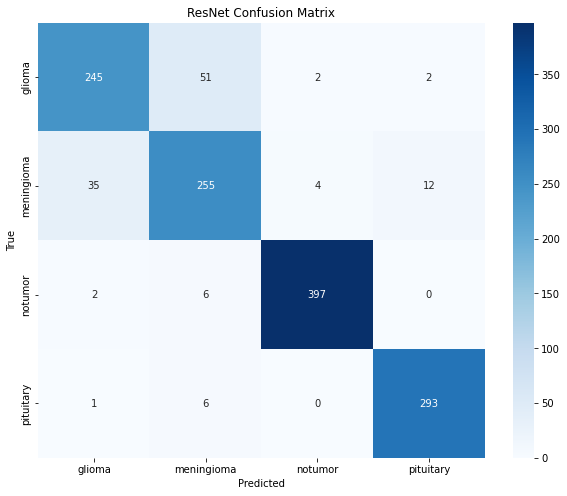

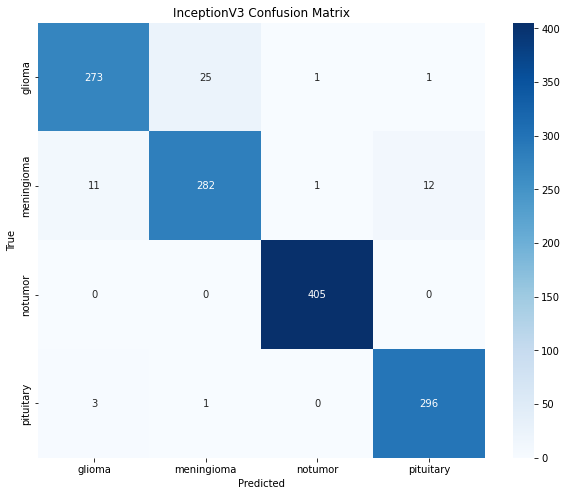

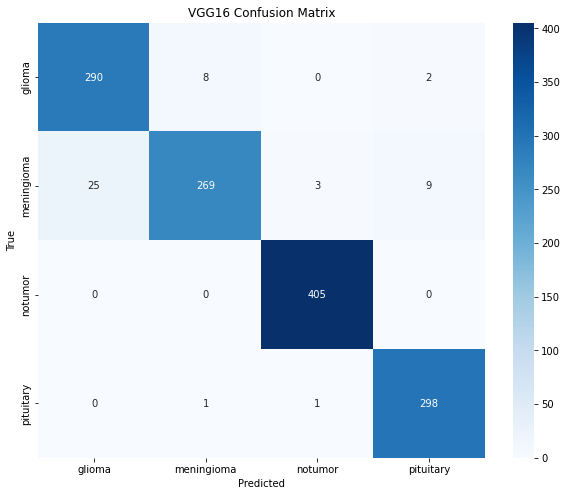

In [ ]:

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_resnet, class_labels, 'ResNet Confusion Matrix')
plot_confusion_matrix(conf_matrix_inception, class_labels, 'InceptionV3 Confusion Matrix')
plot_confusion_matrix(conf_matrix_vgg16, class_labels, 'VGG16 Confusion Matrix')

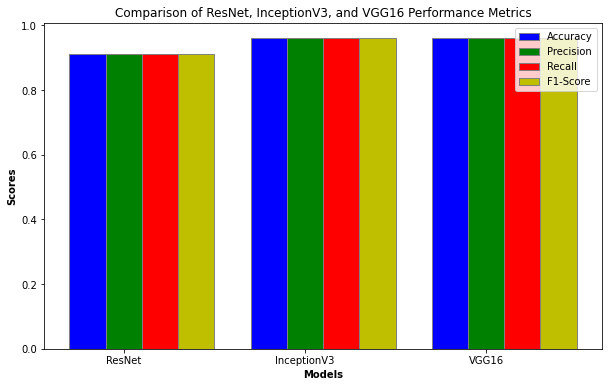

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from classification reports
models = ['ResNet', 'InceptionV3', 'VGG16']
accuracy = [0.91, 0.96, 0.96]
precision = [0.91, 0.96, 0.96]
recall = [0.91, 0.96, 0.96]
f1_score = [0.91, 0.96, 0.96]

# Bar width
bar_width = 0.2
# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar charts
plt.figure(figsize=(10, 6))

plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Comparison of ResNet, InceptionV3, and VGG16 Performance Metrics')
plt.legend()

# Display the chart
plt.show()


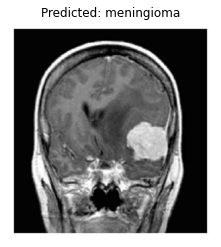

Prediction probabilities: [[0.34772593 0.55691445 0.00084226 0.09451739]]


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import get_custom_objects
# Load the trained VGG16 model
model_path = 'inceptionv3_model.h5'
model = load_model(model_path,compile=False)

# Define the function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img_to_array(img) / 255.0  # Scale pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define the function to make predictions
def predict_image(model, image_path, class_labels):
    img = load_and_preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    predicted_label = class_labels[predicted_class]
    return predicted_label, predictions

# List of class labels (assuming they are the same as the folder names)
class_labels = ["glioma","meningioma","notumor","pituitary"]
# Path to the image you want to predict
image_path = 'dataset\Testing\meningioma\Te-me_0014.jpg'

# Make the prediction
predicted_label, predictions = predict_image(model, image_path, class_labels)

# Display the image and the prediction result
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()

print(f'Prediction probabilities: {predictions}')
